In [1]:
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from smodels.decomposition.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.base.model import Model
from smodels.base.physicsUnits import fb, GeV
import itertools


In [2]:
slhafile = '../../inputFiles/slha/higgsino_spectrum_520_125_dm_4.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile, promptWidth=1e-10*GeV,
                              ignorePromptQNumbers=['spin','eCharge','colordim'])

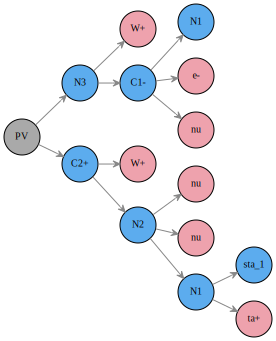

[PV, N3, C2+, W+, C1-, W+, N2, N1, e-, nu, nu, nu, N1, sta_1, ta+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [3]:
stringEl = "(PV > C2+(1),N3(2)), (N3(2) > C1-(3),W+), (C1-(3) > N1,e-,nu), (C2+(1) > N2(4),W+), (N2(4) > N1(5),nu,nu), (N1(5) > sta_1,ta+)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
treeA = TheorySMS()
treeA.add_nodes_from(expSMS.nodes)
treeA.add_edges_from(expSMS.edgeIndices)
treeA.prodXSec = 1.0*fb
treeA.maxWeight = 1.0*fb
treeA.setGlobalProperties()

treeA.draw()
print(treeA.nodes)
print(treeA.nodeIndices)

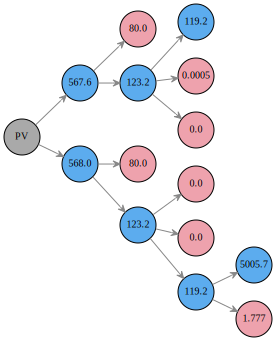

[None, 5.68E+02 [GeV], 5.68E+02 [GeV], 8.00E+01 [GeV], 1.23E+02 [GeV], 8.00E+01 [GeV], 1.23E+02 [GeV], 1.19E+02 [GeV], 5.00E-01 [MeV], 0.00E+00 [MeV], 0.00E+00 [MeV], 0.00E+00 [MeV], 1.19E+02 [GeV], 5.01E+03 [GeV], 1.78E+03 [MeV]]


In [4]:
treeA.draw(labelAttr='mass',attrUnit=GeV)
print(treeA.mass)

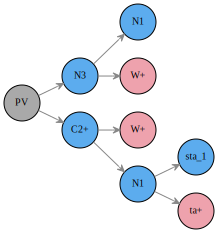

[PV, N3, C2+, N1, W+, W+, N1, sta_1, ta+]
[None, 5.68E+02 [GeV], 5.68E+02 [GeV], 1.19E+02 [GeV], 8.00E+01 [GeV], 8.00E+01 [GeV], 1.19E+02 [GeV], 5.01E+03 [GeV], 1.78E+03 [MeV]]


In [5]:
newEl = treeA.massCompress(5*GeV,minmassgapISR=0*GeV)
newEl.draw()
print(newEl.nodes)
print(newEl.mass)

In [6]:
newEl = treeA.massCompress(3*GeV,0*GeV)
print(newEl)

None


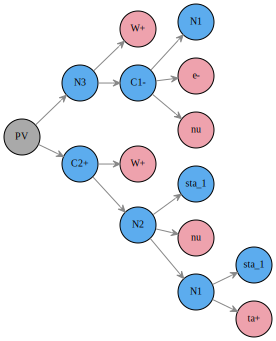

[PV, N3, C2+, W+, C1-, W+, N2, N1, e-, nu, sta_1, nu, N1, sta_1, ta+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [7]:
stringEl = "(PV > C2+(1),N3(2)), (N3(2) > C1-(3),W+), (C1-(3) > N1,e-,nu), (C2+(1) > N2(4),W+), (N2(4) > N1(5),sta_1,nu), (N1(5) > sta_1,ta+)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
treeA = TheorySMS()
treeA.add_nodes_from(expSMS.nodes)
treeA.add_edges_from(expSMS.edgeIndices)
treeA.prodXSec = 1.0*fb
treeA.maxWeight = 1.0*fb
treeA.setGlobalProperties()

treeA.draw()
print(treeA.nodes)
print(treeA.nodeIndices)

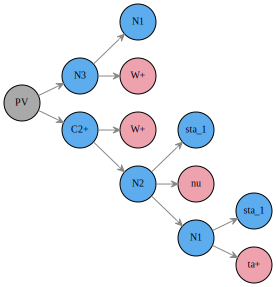

[PV, N3, C2+, N1, W+, W+, N2, sta_1, nu, N1, sta_1, ta+]
[None, 5.68E+02 [GeV], 5.68E+02 [GeV], 1.19E+02 [GeV], 8.00E+01 [GeV], 8.00E+01 [GeV], 1.23E+02 [GeV], 5.01E+03 [GeV], 0.00E+00 [MeV], 1.19E+02 [GeV], 5.01E+03 [GeV], 1.78E+03 [MeV]]


In [8]:
newEl = treeA.massCompress(10*GeV,0*GeV)
newEl.draw()
print(newEl.nodes)
print(newEl.mass)

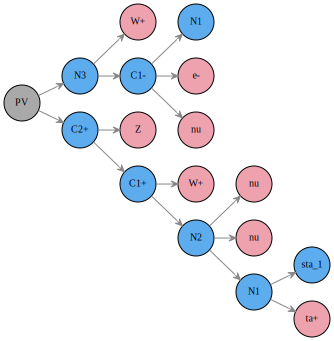

[PV, N3, C2+, W+, C1-, Z, C1+, N1, e-, nu, W+, N2, nu, nu, N1, sta_1, ta+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [9]:
stringEl = "(PV > C2+(1),N3(2)), (N3(2) > C1-(3),W+), (C1-(3) > N1,e-,nu), (C2+(1) > C1+(4),Z), (C1+(4) > N2(5),W+), (N2(5) > N1(6),nu,nu), (N1(6) > sta_1(7),ta+)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
treeA = TheorySMS()
treeA.add_nodes_from(expSMS.nodes)
treeA.add_edges_from(expSMS.edgeIndices)
treeA.prodXSec = 1.0*fb
treeA.maxWeight = 1.0*fb
treeA.setGlobalProperties()

treeA.draw()
print(treeA.nodes)
print(treeA.nodeIndices)

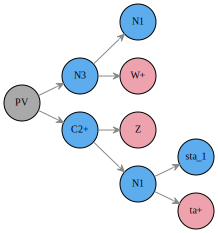

[PV, N3, C2+, N1, W+, Z, N1, sta_1, ta+]
[None, 5.68E+02 [GeV], 5.68E+02 [GeV], 1.19E+02 [GeV], 8.00E+01 [GeV], 9.10E+01 [GeV], 1.19E+02 [GeV], 5.01E+03 [GeV], 1.78E+03 [MeV]]


In [10]:
newEl = treeA.massCompress(10*GeV,0*GeV)
newEl.draw()
print(newEl.nodes)
print(newEl.mass)